# Devices Price Classification System using Python and Spring Boot

This notebook provides a comprehensive analysis and modeling workflow for a Devices Price Classification System. It covers data inspection, handling missing values, exploratory data analysis (EDA), feature engineering, model training, and evaluation. The aim is to build a robust machine learning model that can classify device prices based on various features.





In [1]:
#import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix, classification_report, ConfusionMatrixDisplay
from sklearn.preprocessing import StandardScaler
import pickle

## 1. Data Inspection

In [2]:
# Load the dataset
file_path = 'data/train.xlsx'
data = pd.read_excel(file_path)

# Display dataset information and structure
print("\nDataset Information:")
print(data.info())


Dataset Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   battery_power  2000 non-null   int64  
 1   blue           2000 non-null   int64  
 2   clock_speed    2000 non-null   float64
 3   dual_sim       2000 non-null   int64  
 4   fc             1995 non-null   float64
 5   four_g         1995 non-null   float64
 6   int_memory     1995 non-null   float64
 7   m_dep          1995 non-null   float64
 8   mobile_wt      1996 non-null   float64
 9   n_cores        1996 non-null   float64
 10  pc             1995 non-null   float64
 11  px_height      1996 non-null   float64
 12  px_width       1998 non-null   float64
 13  ram            1998 non-null   float64
 14  sc_h           1999 non-null   float64
 15  sc_w           1999 non-null   float64
 16  talk_time      2000 non-null   int64  
 17  three_g        2000 non-null  

In [3]:
# Display the first few rows of the dataset
print("\nFirst Few Rows of the Dataset:")
data.head()


First Few Rows of the Dataset:


,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1.0,0.0,7.0,0.6,188.0,2.0,...,20.0,756.0,2549.0,9.0,7.0,19,0,0,1,1
1,1021,1,0.5,1,0.0,1.0,53.0,0.7,136.0,3.0,...,905.0,1988.0,2631.0,17.0,3.0,7,1,1,0,2
2,563,1,0.5,1,2.0,1.0,41.0,0.9,145.0,5.0,...,1263.0,1716.0,2603.0,11.0,2.0,9,1,1,0,2
3,615,1,2.5,0,0.0,0.0,10.0,0.8,131.0,6.0,...,1216.0,1786.0,2769.0,16.0,8.0,11,1,0,0,2
4,1821,1,1.2,0,13.0,1.0,44.0,0.6,141.0,2.0,...,1208.0,1212.0,1411.0,8.0,2.0,15,1,1,0,1


In [4]:
# Display the count of non-null values in each column
print("\nNon-Null Count in Each Column:")
print(data.count())


Non-Null Count in Each Column:
battery_power    2000
blue             2000
clock_speed      2000
dual_sim         2000
fc               1995
four_g           1995
int_memory       1995
m_dep            1995
mobile_wt        1996
n_cores          1996
pc               1995
px_height        1996
px_width         1998
ram              1998
sc_h             1999
sc_w             1999
talk_time        2000
three_g          2000
touch_screen     2000
wifi             2000
price_range      2000
dtype: int64


In [5]:
# Check for missing values
print("\nMissing Values in Each Column:")
print(data.isnull().sum())


Missing Values in Each Column:
battery_power    0
blue             0
clock_speed      0
dual_sim         0
fc               5
four_g           5
int_memory       5
m_dep            5
mobile_wt        4
n_cores          4
pc               5
px_height        4
px_width         2
ram              2
sc_h             1
sc_w             1
talk_time        0
three_g          0
touch_screen     0
wifi             0
price_range      0
dtype: int64


In [6]:
# Check class balance in the target variable
print("\nClass Balance in the Target Variable:")
print(data['price_range'].value_counts(normalize=True))


Class Balance in the Target Variable:
price_range
1    0.25
2    0.25
3    0.25
0    0.25
Name: proportion, dtype: float64


After inspection, the dataset reveals the presence of few missing values and a balanced target variable.

## 2. Exploratory Data Analysis (EDA)


Generating Correlation Heatmap...


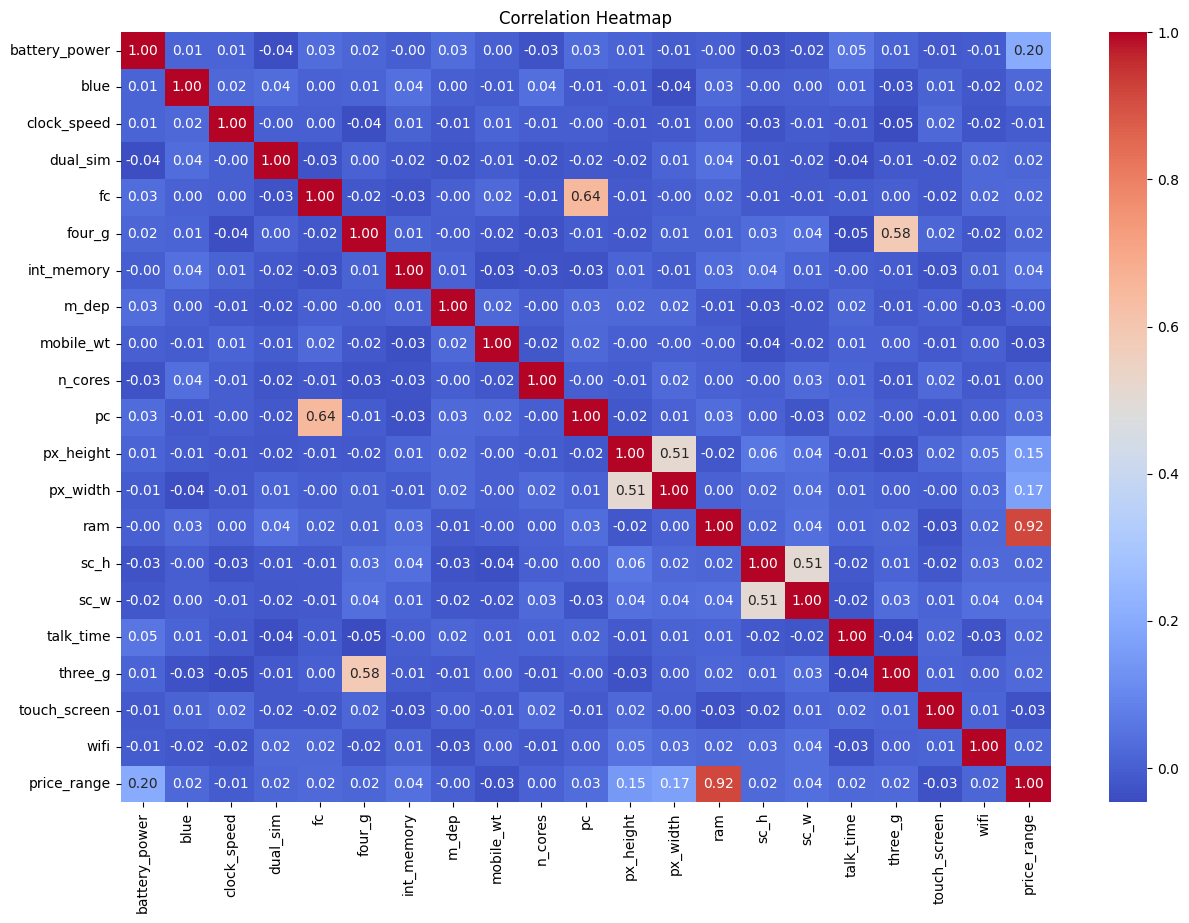

In [8]:
# Correlation Heatmap
print("\nGenerating Correlation Heatmap...")
plt.figure(figsize=(15, 10))
corr_matrix = data.corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap')
plt.show()

**Key Observations:**


1.  **Price Range Correlation:** `ram` has a strong positive correlation with `price_range` (0.92). This suggests that higher RAM is strongly associated with higher price range. Other features have relatively low correlation values with `price_range`, indicating that ram is the most influential feature in determining the price range. `battery_power` also suggests a moderate positive correlation.

2.   **Feature Interrelationships:** `px_width` and `px_height` have a moderate positive correlation (0.51), which makes sense as higher resolutions are likely to have both larger widths and heights. `sc_h` and `sc_w` also show a moderate positive correlation (0.51), indicating that larger screen heights often accompany larger screen widths.

3.  Mobile Weight and Touch Screen: Show negative correlations with price range, suggesting that lighter devices and those without touch screens may tend to be cheaper.



**Recommendations:**


*   Consider creating a combined feature that represents overall screen resolution (e.g., `px_area = px_width * px_height`) to see if it has a stronger correlation with `price_range`.

* **Histograms:** For `battery_power`, `ram`, and `px_area` to visually inspect the distribution of these key features.

* **Boxplots:** To compare distributions of `ram` and `battery_power` across different price ranges.



## 3. Feature Engineering

In [9]:
# Creating a new feature: screen_area
data['px_area'] = data['px_height'] * data['px_width']

# Display the first few rows with the new feature
data[['px_height', 'px_width', 'px_area']].head()


,px_height,px_width,px_area
0,20.0,756.0,15120.0
1,905.0,1988.0,1799140.0
2,1263.0,1716.0,2167308.0
3,1216.0,1786.0,2171776.0
4,1208.0,1212.0,1464096.0



Generating Correlation Heatmap...


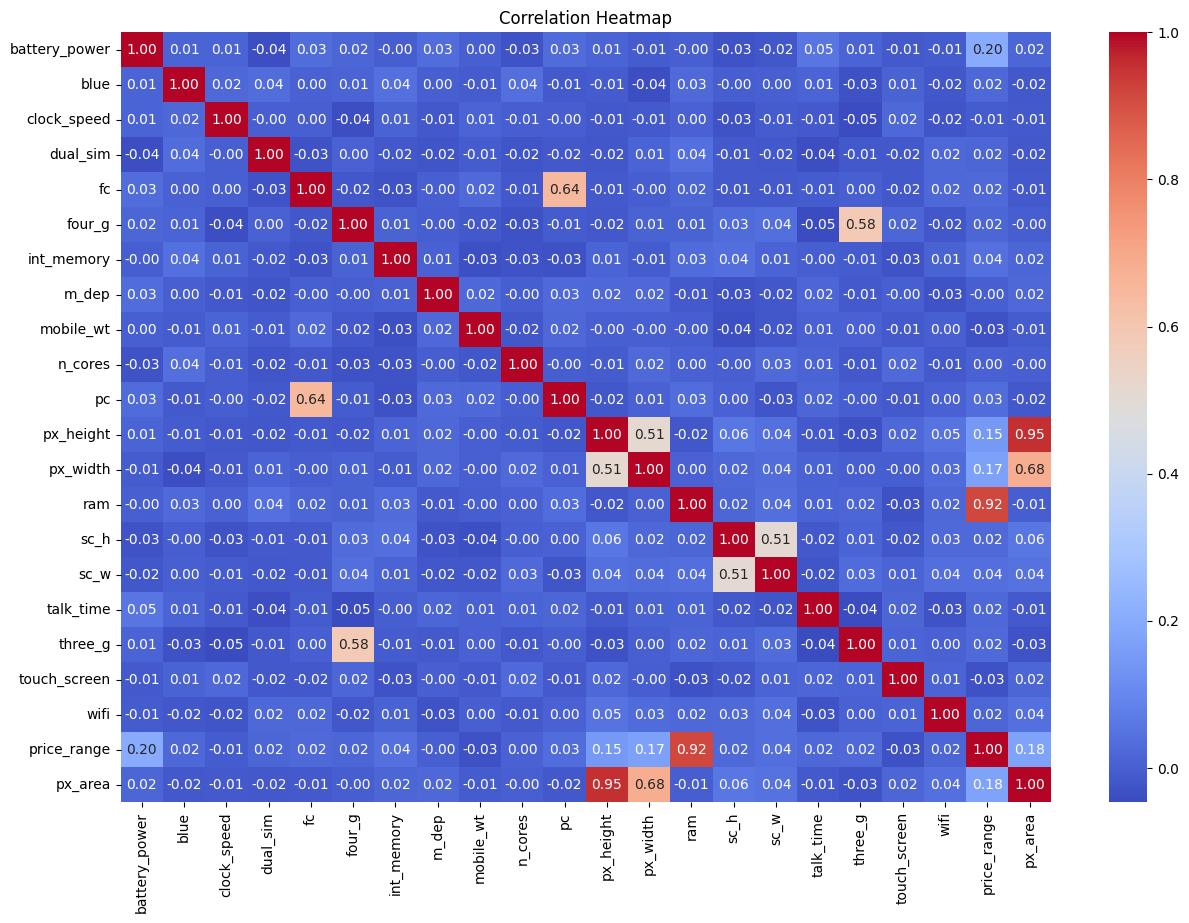

In [10]:
# Correlation Heatmap
print("\nGenerating Correlation Heatmap...")
plt.figure(figsize=(15, 10))
corr_matrix = data.corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap')
plt.show()

The new engineered feature `px_area` has a slightly higher positive correlation than `px_height` and `px_width` with `price_range` at 0.18.

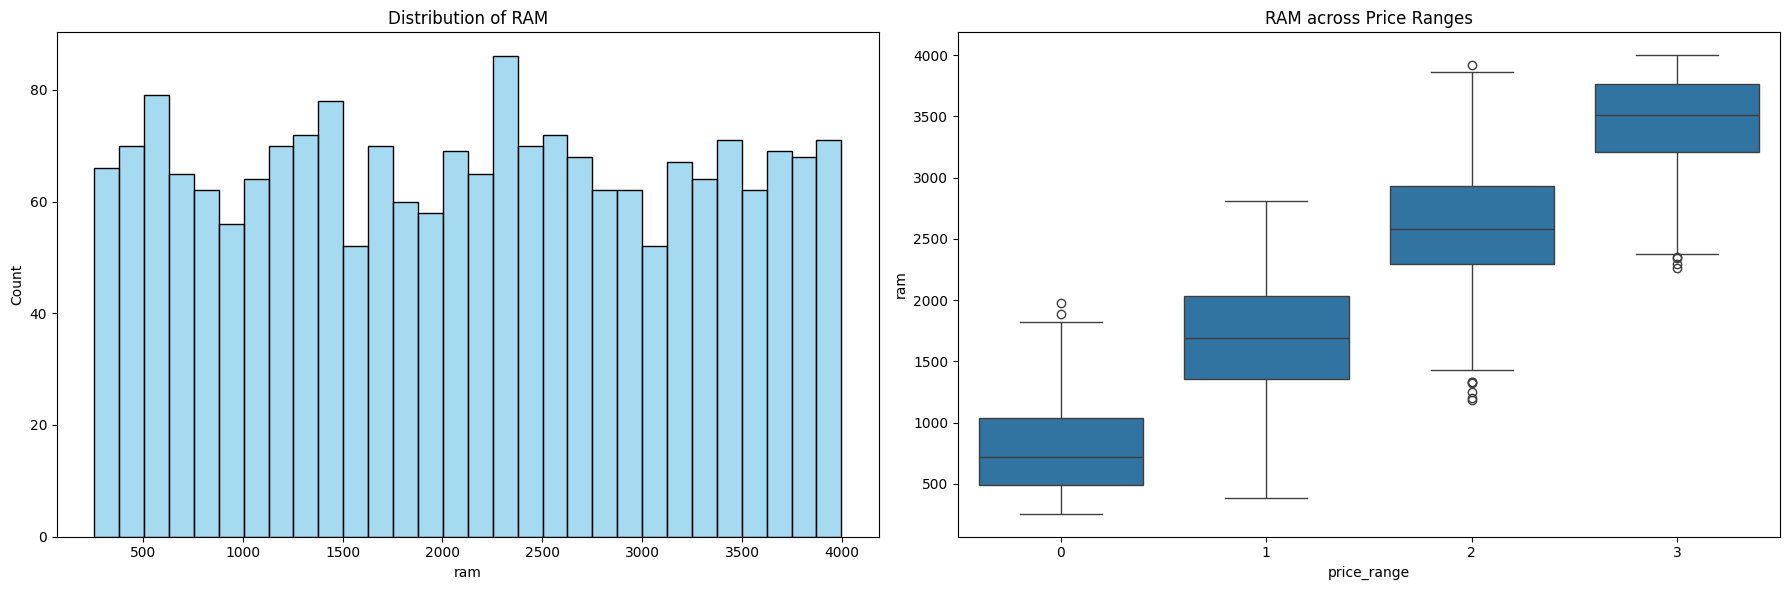

In [46]:
#Distribution of RAM

# Create a figure to hold the subplots
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(18, 6))

# Histogram of RAM
sns.histplot(data['ram'], bins=30, ax=axes[0], color='skyblue')
axes[0].set_title('Distribution of RAM')

# Boxplot of RAM across different price ranges
sns.boxplot(x='price_range', y='ram', data=data, ax=axes[1])
axes[1].set_title('RAM across Price Ranges')

plt.tight_layout()
plt.show()



*   The histogram shows a broad distribution of RAM across devices, indicating a mix of low, medium, and high RAM devices in the dataset.

*   The boxplot illustrates a clear trend where higher RAM correlates with a higher price range. Devices in the very high cost category (price range 3) typically have higher RAM.



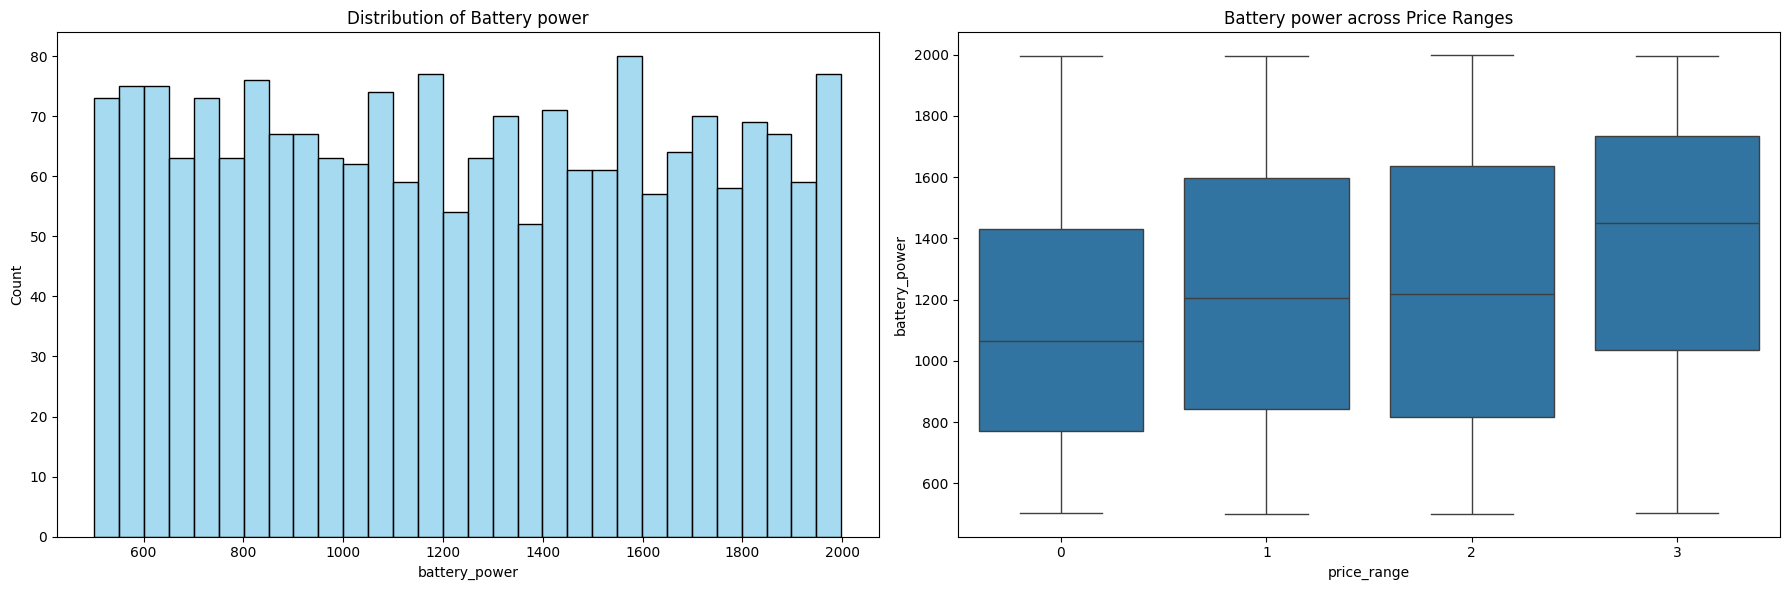

In [48]:
# Create a figure to hold the subplots
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(18, 6))

# Histogram of Battery power
sns.histplot(data['battery_power'], bins=30, ax=axes[0], color='skyblue')
axes[0].set_title('Distribution of Battery power')

# Boxplot of Battery power across different price ranges
sns.boxplot(x='price_range', y='battery_power', data=data, ax=axes[1])
axes[1].set_title('Battery power across Price Ranges')

plt.tight_layout()
plt.show()



*   The distribution of battery power is fairly uniform, indicating a balanced range of devices with various battery capacities.
*   The boxplots suggests that it does not significantly discriminate between different price tiers on its own. This could imply that consumers might find high-capacity batteries across all price ranges, making it a less definitive factor in determining the price range.



## 4. Data Preprocessing


In [11]:
# Handling Missing Values
print("\nHandling Missing Values by Filling with Median...")
data.fillna(data.median(), inplace=True)
print("\nMissing Values After Imputation:")
print(data.isnull().sum())


Handling Missing Values by Filling with Median...

Missing Values After Imputation:
battery_power    0
blue             0
clock_speed      0
dual_sim         0
fc               0
four_g           0
int_memory       0
m_dep            0
mobile_wt        0
n_cores          0
pc               0
px_height        0
px_width         0
ram              0
sc_h             0
sc_w             0
talk_time        0
three_g          0
touch_screen     0
wifi             0
price_range      0
px_area          0
dtype: int64


In [12]:
print("\nSplitting Data into Features and Target Variable...")
X = data.drop(columns=['price_range'])
y = data['price_range']

# Train-Test Split
print("\nPerforming Train-Test Split...")
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)


Splitting Data into Features and Target Variable...

Performing Train-Test Split...


In [13]:
#apply standard scaling on both training and evaluation data
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_val = sc.transform(X_val)

In [49]:
# Save the scaler to be used on any future test data
with open('outputs/scaler.pkl', 'wb') as scaler_file:
    pickle.dump(sc, scaler_file)

## 5. Experimenting with base models

In [14]:
#this function is used to display confusion matrix
def evaluate_model(y_true, y_predicted):

  # Print classification report
  print(classification_report(y_true, y_predicted))

  # Generate confusion matrix
  cf_matrix = confusion_matrix(y_true, y_predicted)

  # Create ConfusionMatrixDisplay object
  disp = ConfusionMatrixDisplay(cf_matrix)

  # Plot the confusion matrix
  disp.plot(cmap='plasma')
  plt.show()

              precision    recall  f1-score   support

           0       0.98      0.97      0.98       105
           1       0.95      0.98      0.96        91
           2       0.99      0.95      0.97        92
           3       0.97      0.99      0.98       112

    accuracy                           0.97       400
   macro avg       0.97      0.97      0.97       400
weighted avg       0.97      0.97      0.97       400



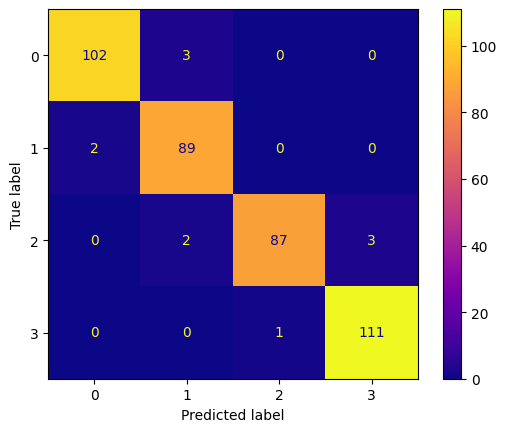

In [15]:
#Logistic Regression

clf = LogisticRegression()
clf.fit(X_train,y_train)
yhat = clf.predict(X_val)
evaluate_model(y_val,yhat)

              precision    recall  f1-score   support

           0       0.95      0.95      0.95       105
           1       0.87      0.86      0.86        91
           2       0.83      0.86      0.84        92
           3       0.95      0.93      0.94       112

    accuracy                           0.90       400
   macro avg       0.90      0.90      0.90       400
weighted avg       0.90      0.90      0.90       400



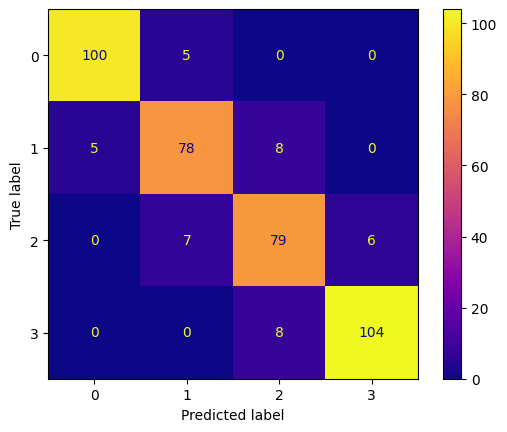

In [16]:
#Random Forest

clf = RandomForestClassifier()
clf.fit(X_train,y_train)
yhat = clf.predict(X_val)
evaluate_model(y_val,yhat)

              precision    recall  f1-score   support

           0       0.95      0.92      0.94       105
           1       0.79      0.89      0.84        91
           2       0.85      0.82      0.83        92
           3       0.96      0.93      0.95       112

    accuracy                           0.89       400
   macro avg       0.89      0.89      0.89       400
weighted avg       0.90      0.89      0.89       400



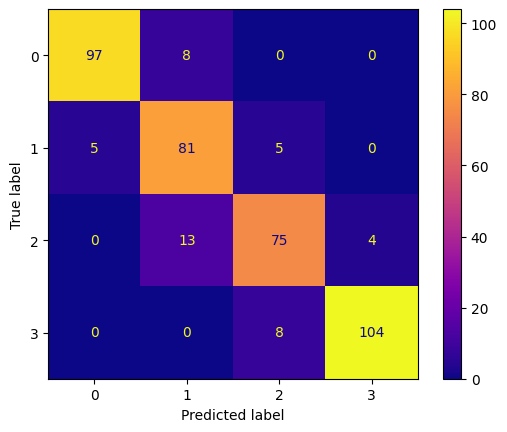

In [17]:
#Support Vector Machine

clf = SVC()
clf.fit(X_train,y_train)
yhat = clf.predict(X_val)
evaluate_model(y_val,yhat)

It can be inferred that the three models are performing quite well on the dataset. We can use grid search or randomized search to perform hyperparameter tuning.

##Randomized Search

In [18]:
# Setting up the parameter grid for RandomizedSearchCV for Random Forest
param_dist_rf = {
    'n_estimators': [int(x) for x in np.linspace(start=10, stop=200, num=20)],
    'max_depth': [int(x) for x in np.linspace(10, 110, num=11)] ,
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'bootstrap': [True, False]
}

# Setting up the parameter grid for RandomizedSearchCV for Logistic Regression
param_dist_lr = {
    'C': np.logspace(-4, 4, 20),
    'solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga']
}

# Setting up the parameter grid for RandomizedSearchCV for SVM
param_dist_svm = {
    'C': np.logspace(-4, 4, 20),
    'gamma': np.logspace(-4, 4, 20),
    'kernel': ['linear', 'poly', 'rbf', 'sigmoid']
}

# Initializing the classifiers
rf = RandomForestClassifier(random_state=42)
lr = LogisticRegression(max_iter=10000, random_state=42)
svm = SVC(random_state=42)

# Initializing RandomizedSearchCV for each classifier
rf_random = RandomizedSearchCV(estimator=rf, param_distributions=param_dist_rf,
                               n_iter=100, cv=3, verbose=3, random_state=42)

lr_random = RandomizedSearchCV(estimator=lr, param_distributions=param_dist_lr,
                               n_iter=100, cv=3, verbose=3, random_state=42)

svm_random = RandomizedSearchCV(estimator=svm, param_distributions=param_dist_svm,
                                n_iter=100, cv=3, verbose=3, random_state=42)

# Training the models
print("\nTraining Random Forest Classifier with RandomizedSearchCV...")
rf_random.fit(X_train, y_train)

print("\nTraining Logistic Regression Classifier with RandomizedSearchCV...")
lr_random.fit(X_train, y_train)

print("\nTraining SVM Classifier with RandomizedSearchCV...")
svm_random.fit(X_train, y_train)


Training Random Forest Classifier with RandomizedSearchCV...
Fitting 3 folds for each of 100 candidates, totalling 300 fits
[CV 1/3] END bootstrap=True, max_depth=10, min_samples_leaf=4, min_samples_split=5, n_estimators=100;, score=0.863 total time=   0.5s
[CV 2/3] END bootstrap=True, max_depth=10, min_samples_leaf=4, min_samples_split=5, n_estimators=100;, score=0.869 total time=   0.5s
[CV 3/3] END bootstrap=True, max_depth=10, min_samples_leaf=4, min_samples_split=5, n_estimators=100;, score=0.842 total time=   0.6s
[CV 1/3] END bootstrap=True, max_depth=60, min_samples_leaf=4, min_samples_split=2, n_estimators=60;, score=0.856 total time=   0.3s
[CV 2/3] END bootstrap=True, max_depth=60, min_samples_leaf=4, min_samples_split=2, n_estimators=60;, score=0.876 total time=   0.4s
[CV 3/3] END bootstrap=True, max_depth=60, min_samples_leaf=4, min_samples_split=2, n_estimators=60;, score=0.841 total time=   0.4s
[CV 1/3] END bootstrap=True, max_depth=110, min_samples_leaf=1, min_sample

RandomizedSearchCV(cv=3, estimator=SVC(random_state=42), n_iter=100,
                   param_distributions={'C': array([1.00000000e-04, 2.63665090e-04, 6.95192796e-04, 1.83298071e-03,
       4.83293024e-03, 1.27427499e-02, 3.35981829e-02, 8.85866790e-02,
       2.33572147e-01, 6.15848211e-01, 1.62377674e+00, 4.28133240e+00,
       1.12883789e+01, 2.97635144e+01, 7.84759970e+01, 2.06913808e+02,
       5.45559478e+...
                                        'gamma': array([1.00000000e-04, 2.63665090e-04, 6.95192796e-04, 1.83298071e-03,
       4.83293024e-03, 1.27427499e-02, 3.35981829e-02, 8.85866790e-02,
       2.33572147e-01, 6.15848211e-01, 1.62377674e+00, 4.28133240e+00,
       1.12883789e+01, 2.97635144e+01, 7.84759970e+01, 2.06913808e+02,
       5.45559478e+02, 1.43844989e+03, 3.79269019e+03, 1.00000000e+04]),
                                        'kernel': ['linear', 'poly', 'rbf',
                                                   'sigmoid']},
                   random_state=42, verbose=3)

## Model Evaluation


Evaluating Best Random Forest Model...
              precision    recall  f1-score   support

           0       0.95      0.94      0.95       105
           1       0.86      0.90      0.88        91
           2       0.86      0.86      0.86        92
           3       0.94      0.92      0.93       112

    accuracy                           0.91       400
   macro avg       0.90      0.91      0.90       400
weighted avg       0.91      0.91      0.91       400



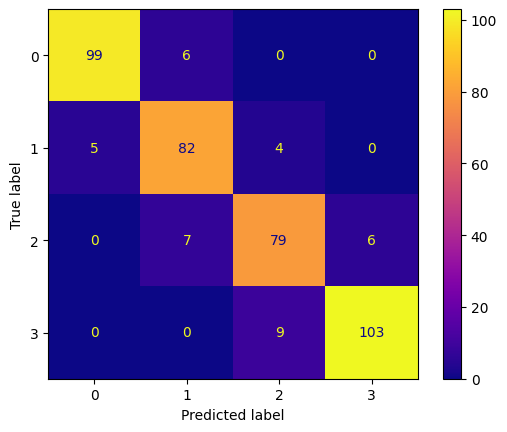

In [19]:
# Evaluating the best Random Forest model
print("\nEvaluating Best Random Forest Model...")
best_rf = rf_random.best_estimator_
y_pred_rf = best_rf.predict(X_val)
evaluate_model(y_val,y_pred_rf)


Evaluating Best Logistic Regression Model...
              precision    recall  f1-score   support

           0       1.00      0.95      0.98       105
           1       0.91      1.00      0.95        91
           2       0.99      0.93      0.96        92
           3       0.98      0.99      0.99       112

    accuracy                           0.97       400
   macro avg       0.97      0.97      0.97       400
weighted avg       0.97      0.97      0.97       400



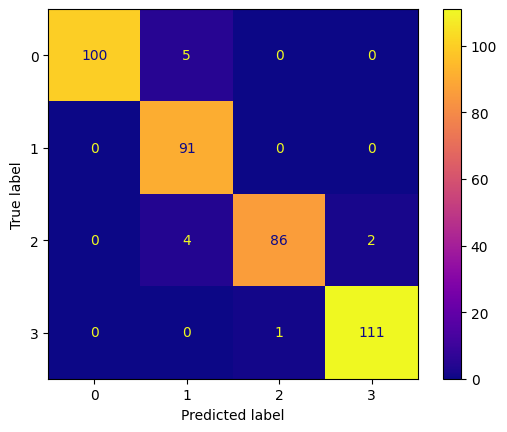

In [20]:
# Evaluating the best Logistic Regression model
print("\nEvaluating Best Logistic Regression Model...")
best_lr = lr_random.best_estimator_
y_pred_lr = best_lr.predict(X_val)
evaluate_model(y_val,y_pred_lr)


Evaluating Best SVM Model...
              precision    recall  f1-score   support

           0       1.00      0.94      0.97       105
           1       0.90      1.00      0.95        91
           2       0.99      0.93      0.96        92
           3       0.98      0.99      0.99       112

    accuracy                           0.97       400
   macro avg       0.97      0.97      0.97       400
weighted avg       0.97      0.97      0.97       400



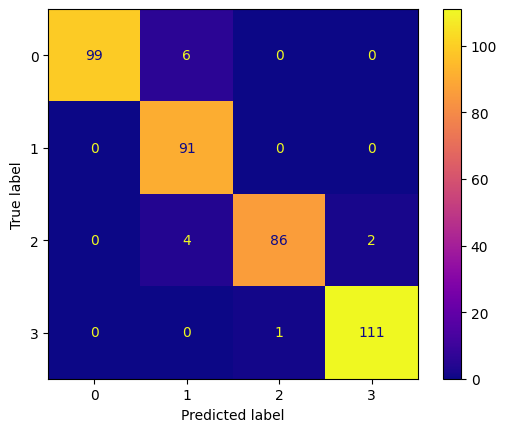

In [21]:
# Evaluating the best SVM model
print("\nEvaluating Best SVM Model...")
best_svm = svm_random.best_estimator_
y_pred_svm = best_svm.predict(X_val)
evaluate_model(y_val,y_pred_svm)

In [22]:
# Display the best hyperparameters
print("\nBest Hyperparameters found by RandomizedSearchCV - Random Forest:")
print(rf_random.best_params_)

print("\nBest Hyperparameters found by RandomizedSearchCV - Logistic Regression:")
print(lr_random.best_params_)

print("\nBest Hyperparameters found by RandomizedSearchCV - SVM:")
print(svm_random.best_params_)


Best Hyperparameters found by RandomizedSearchCV - Random Forest:
{'n_estimators': 110, 'min_samples_split': 5, 'min_samples_leaf': 2, 'max_depth': 20, 'bootstrap': True}

Best Hyperparameters found by RandomizedSearchCV - Logistic Regression:
{'solver': 'sag', 'C': 1438.44988828766}

Best Hyperparameters found by RandomizedSearchCV - SVM:
{'kernel': 'linear', 'gamma': 0.03359818286283781, 'C': 10000.0}


In [23]:
#choosing the best model
best_rf_score = best_rf.score(X_val, y_val)
best_lr_score = best_lr.score(X_val, y_val)
best_svm_score = best_svm.score(X_val, y_val)

# Choose the best model
best_model = None
if best_rf_score >= best_lr_score and best_rf_score >= best_svm_score:
    best_model = best_rf
elif best_lr_score >= best_rf_score and best_lr_score >= best_svm_score:
    best_model = best_lr
else:
    best_model = best_svm

In [24]:
best_model

LogisticRegression(C=1438.44988828766, max_iter=10000, random_state=42,
                   solver='sag')

In [25]:
pickle.dump(best_model, open('outputs/best_model.pkl', 'wb'))


##Generate predicitons on testset

In [26]:
test_data = pd.read_excel('data/test.xlsx')
# Preprocess the test data
test_data['px_area'] = test_data['px_height'] * test_data['px_width']
test_data.fillna(test_data.median(), inplace=True)

# Extract IDs and features
test_ids = test_data['id']
X_test = test_data.drop(columns=['id'])

# Apply the same scaling to the test set
X_test = sc.transform(X_test)

In [27]:
# Generate predictions
predictions = best_model.predict(X_test)

# Create a DataFrame with IDs and predictions
results = pd.DataFrame({'id': test_ids, 'price_range': predictions})

# Display the first few rows of the results
results.head()

,id,price_range
0,1,3
1,2,3
2,3,2
3,4,3
4,5,1


In [50]:
# Save results to a CSV file
results.to_csv('outputs/test_predictions.csv', index=False)